# Introduction

#### Latar Belakang
Dataset ini berisi data cuaca harian di Australia. Dataset ini cocok digunakan untuk mempelajari hubungan antara kondisi cuaca dan kemungkinan hujan besok.
Kasus ini dipilih sebagai data dalam mengerjakan logistic regression dan SVM karena memiliki beberapa keunggulan, yaitu:
1. Data yang cukup: Dataset ini memiliki 366 observasi, yang cukup untuk pelatihan model.
2. Variabel yang relevan: Variabel-variabel dalam dataset ini relevan dengan kemungkinan hujan besok.
3. Label yang jelas: Variabel target, RainTomorrow, memiliki label yang jelas, yaitu Ya atau Tidak.

#### Data yang Digunakan
Data ini bersumber dari Kaggle dengan link sebagai berikut : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

#### Objektif
Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:
1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

# Import Library

In [2]:
import numpy as np
import pandas as pd

# Import library unruk plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Library untuk melakukan permodelan, dll.
import sklearn
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Data Loading

Mengimpor weatherAUS.csv sebagai df

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Menampilkan informasi mengenai dataset weatherAUS.csv

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Menampilkan jumlah baris dan kolom data.

In [5]:
df.shape

(145460, 23)

Data ini terdiri dari 145460 baris dan 23 kolom.

# Data Cleaning

### Missing Value

Mengecek missing value.

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
# Mengidentifikasi kolom jenis kategorikal
categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
# Mengidentifikasi kolom jenis numerical
# Find numerical columns
numerical = [var for var in df.columns if pd.api.types.is_numeric_dtype(df[var])]
# Print numerical columns
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Membersihkan Missing Value pada kelompok data jenis kategorikal dengan Mode.

In [9]:
columns_to_fill_mode = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

for column in columns_to_fill_mode:
    df[column] = df[column].fillna(df[column].mode()[0])

Membersihkan Missing Value pada kelompok data jenis numerikal dengan Mean.

In [10]:
columns_to_fill = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

Mengecek kembali apakah missing value sudah terisi atau belum.

In [11]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Missing value sudah terisi.

In [12]:
def plot_corr(df, size=15):
    corr = df.corr()
    plt.figure(figsize=(size, size))
    plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

<Figure size 1500x1500 with 0 Axes>

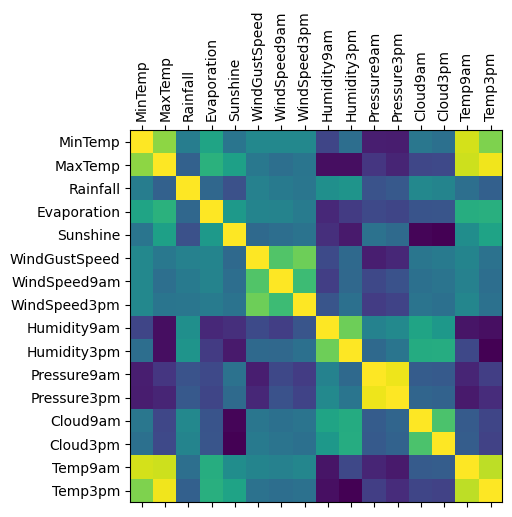

In [13]:
numerical_df = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
plot_corr(numerical_df)

In [14]:
numerical_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733400,0.102706,0.351321,0.051297,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.062151,0.016722,0.897692,0.699211
MaxTemp,0.733400,1.000000,-0.074040,0.438653,0.328931,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,-0.225315,-0.212760,0.879170,0.968713
Rainfall,0.102706,-0.074040,1.000000,-0.037863,-0.170973,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.171144,0.145343,0.011069,-0.077684
Evaporation,0.351321,0.438653,-0.037863,1.000000,0.288169,0.147353,0.139968,0.094352,-0.373732,-0.286025,-0.210961,-0.230351,-0.150264,-0.145472,0.414592,0.425573
Sunshine,0.051297,0.328931,-0.170973,0.288169,1.000000,-0.023844,0.003843,0.037836,-0.348855,-0.443121,0.031406,-0.014815,-0.532497,-0.553853,0.208580,0.346685
WindGustSpeed,0.172553,0.065895,0.126446,0.147353,-0.023844,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.052417,0.079927,0.145904,0.031884
WindSpeed9am,0.173404,0.014294,0.085925,0.139968,0.003843,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.019714,0.041667,0.127592,0.004476
WindSpeed3pm,0.173058,0.049717,0.056527,0.094352,0.037836,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.041611,0.019813,0.161060,0.027587
Humidity9am,-0.230970,-0.497927,0.221380,-0.373732,-0.348855,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,0.353490,0.273314,-0.469641,-0.490709
Humidity3pm,0.005995,-0.498760,0.248905,-0.286025,-0.443121,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,0.398762,0.406605,-0.216964,-0.555608


Terdapat korelasi pada kolom Temp9pm, Temp3pm, dan Pressure 3pm sehingga harus didrop

In [15]:
del df['Temp3pm']
del df['Temp9am']
del df['Pressure3pm']

 # Data Exploration

#### Menampilkan nilai unik dalam kolom 'Location'

In [31]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

#### Menampilkan histogram unutk setiap kolom dalam DataFrame

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Cloud9am'}>],
       [<Axes: title={'center': 'Cloud3pm'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

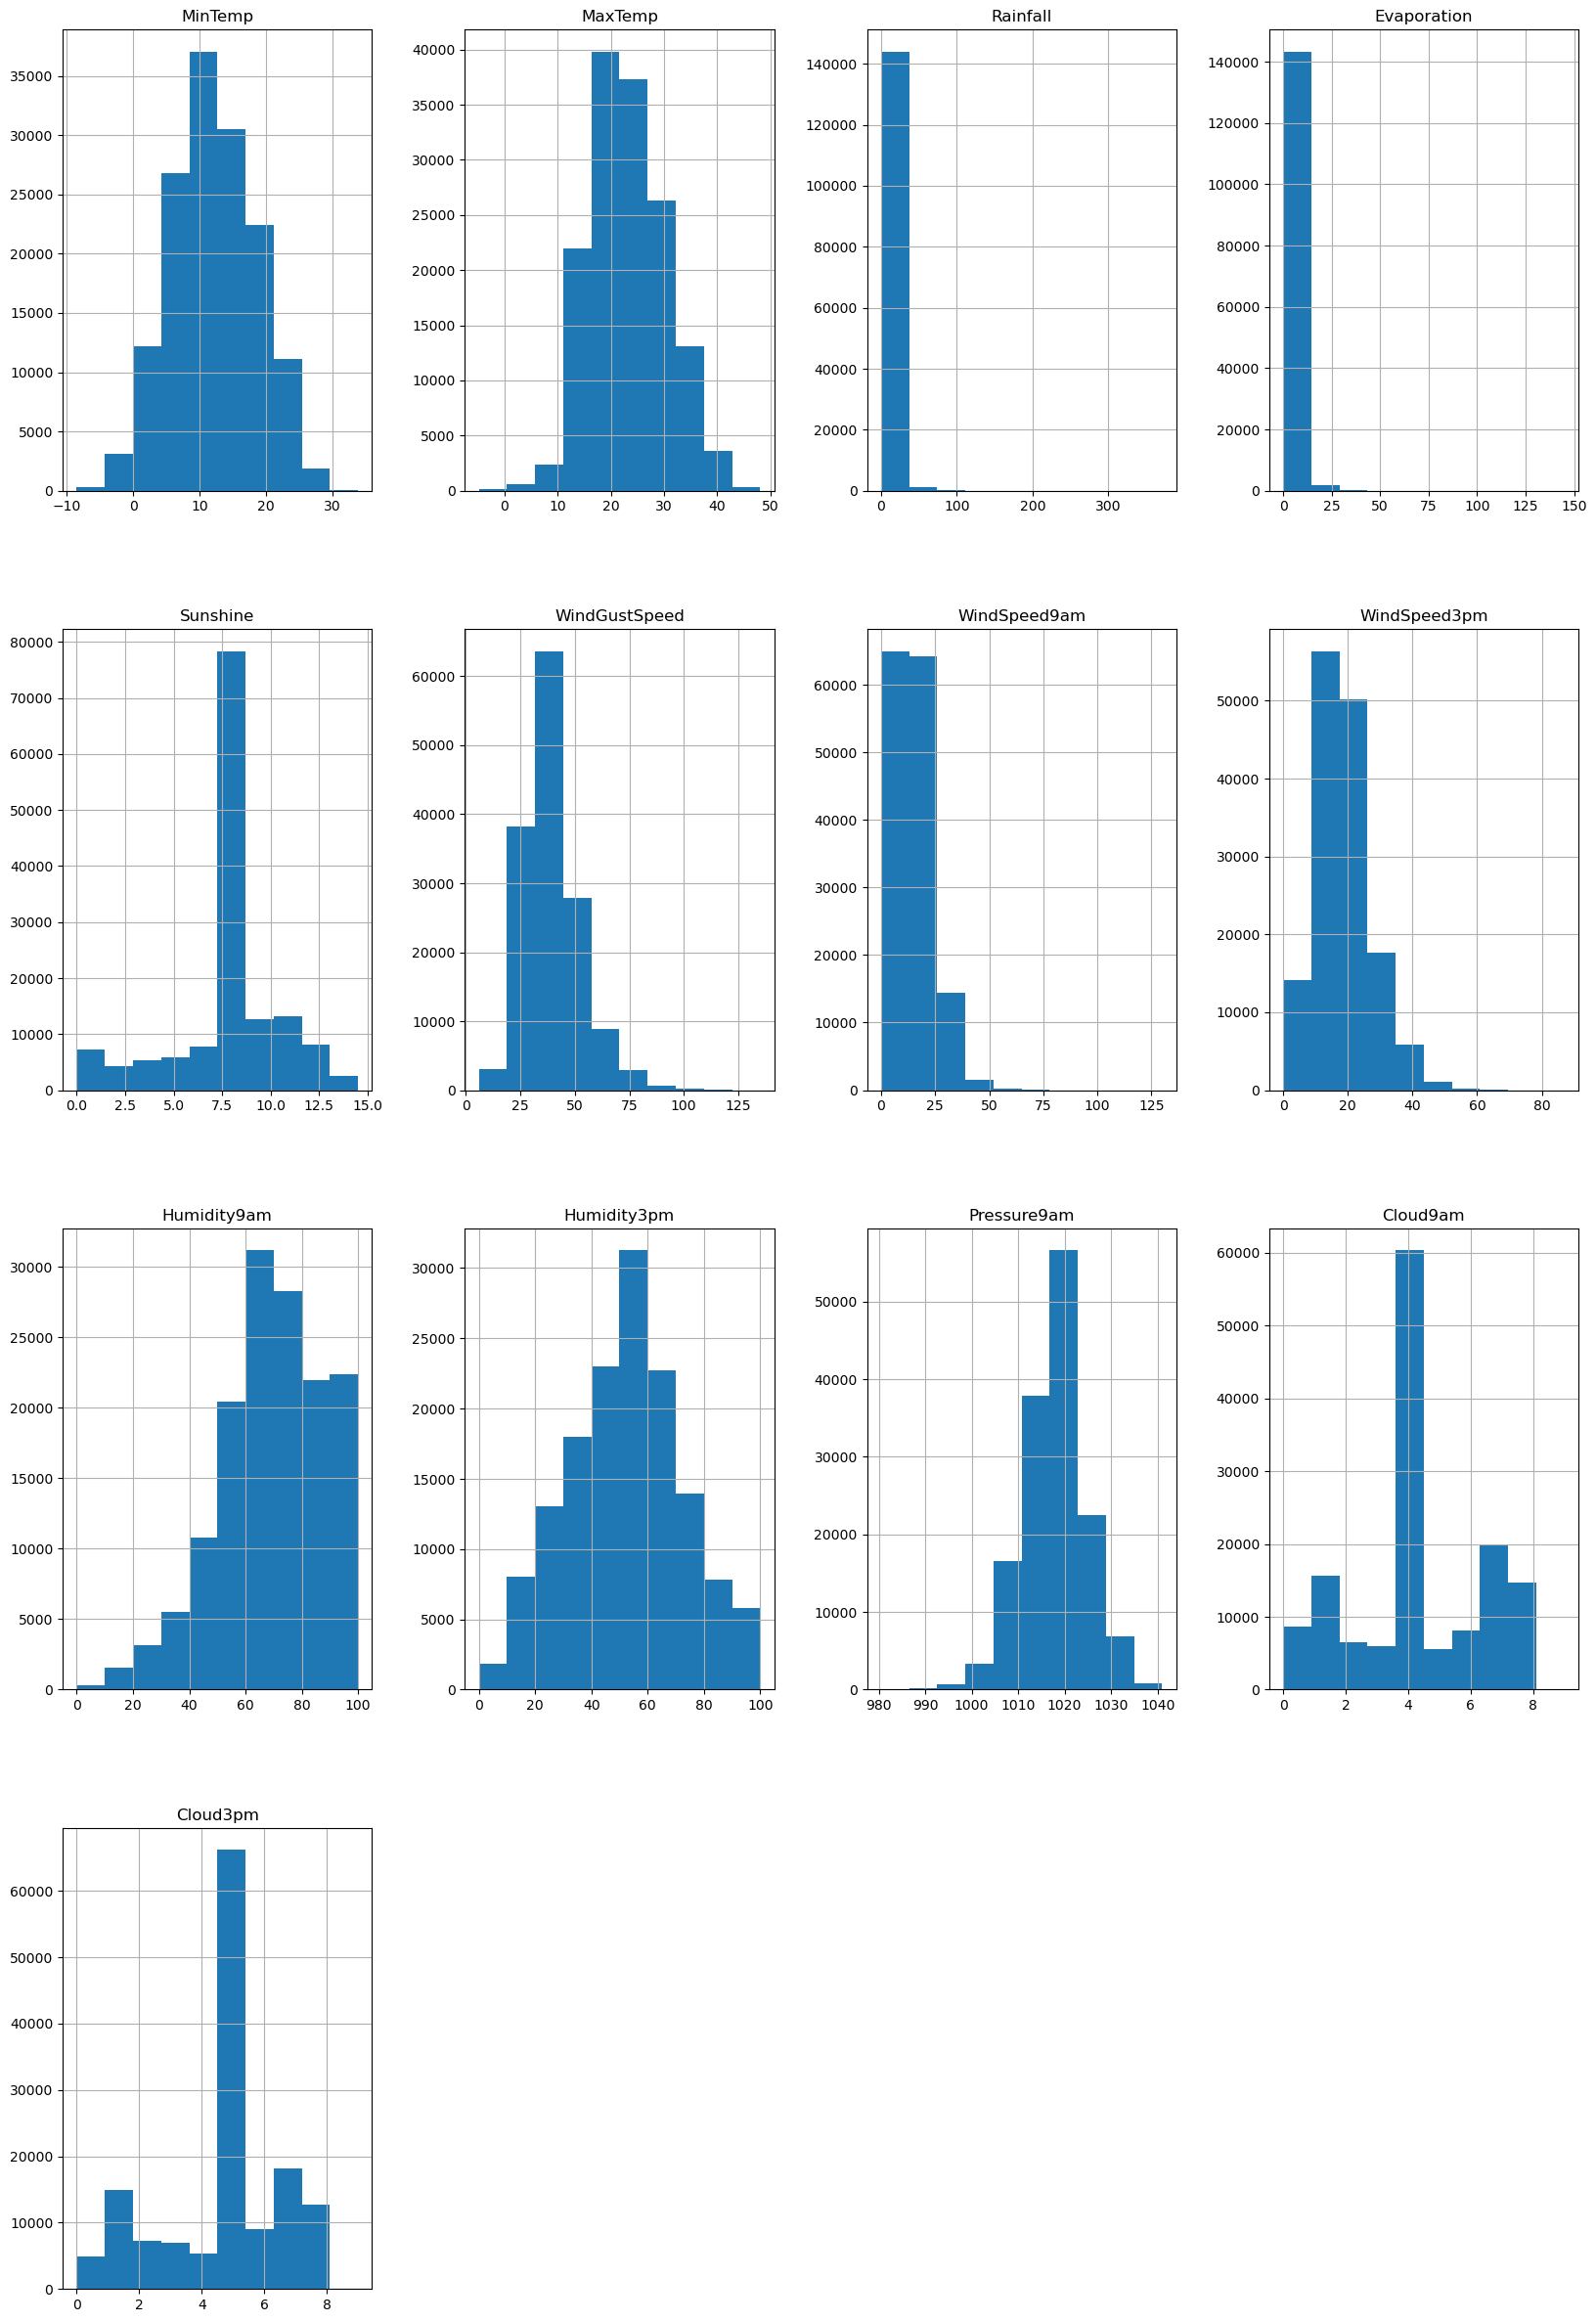

In [16]:
df.hist(figsize=(20, 30))

#### Persebaran Curah Hujan di Australia

<Figure size 1000x3000 with 0 Axes>

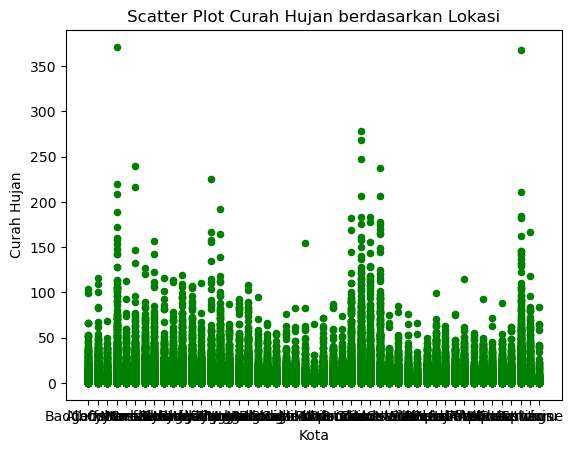

In [17]:
# Membuat scatter-plot
# Membuat ukuran scatter-plot
plt.figure(figsize=(10, 30))

# Membuat scatter plot
df.plot(kind='scatter', x='Location', y='Rainfall', marker='o', color='green')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot Curah Hujan berdasarkan Lokasi')
plt.ylabel('Curah Hujan')
plt.xlabel('Kota')

# Menampilkan plot
plt.show()

Scatter plot tersebut menunjukkan bahwa terdapat hubungan positif antara curah hujan dan lokasi di Australia. Artinya, kota-kota yang terletak di bagian selatan Australia, seperti Sydney dan Melbourne, memiliki curah hujan yang lebih tinggi dibandingkan kota-kota yang terletak di bagian utara Australia, seperti Darwin dan Cairns.

Kesimpulan dari scatter plot tersebut adalah bahwa curah hujan di Australia bervariasi secara geografis, dengan bagian selatan yang lebih basah dan bagian utara yang lebih kering. Kota-kota di bagian selatan Australia memiliki curah hujan yang lebih tinggi dibandingkan kota-kota di bagian utara Australia.

#### Persebaran Curah Hujan Berdasarkan Waktu

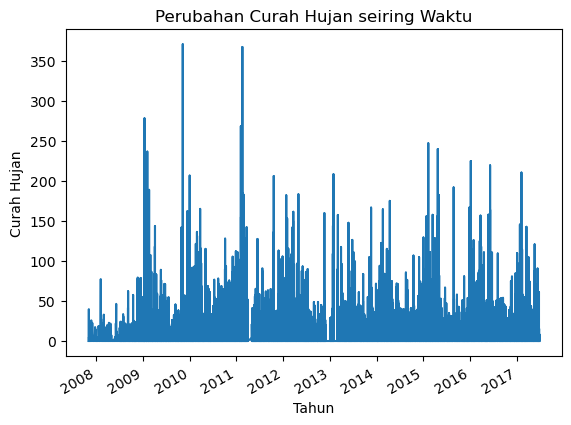

In [18]:
# Membuat line plot
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Rainfall'].plot(kind='line')

# Menambahkan judul dan label sumbu
plt.title('Perubahan Curah Hujan seiring Waktu')
plt.ylabel('Curah Hujan')
plt.xlabel('Tahun')

# Menampilkan plot
plt.show()

Line plot ini menunjukan bahwa curah hujan di Australia dari tahun 2008 hingga 2017. Curah dapat berubah-ubah sering waktu. Curah hujan tertinggi terjadi di tahun 2010 disusul tahun 2011.

In [19]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.000000,4.50993,No,No
2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,4.447461,4.50993,No,No
2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,4.447461,2.00000,No,No
2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,4.447461,4.50993,No,No
2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.000000,8.00000,No,No


# Data Preprocessing

Dalam mengerjakan logistic regression harus diencoding dulu karena logistic regression adalah metode pembelajaran mesin supervised yang digunakan untuk memprediksi probabilitas hasil kategorikal, seperti "ya" atau "tidak".

Data yang digunakan untuk logistic regression harus berupa data numerik. Jika data kategorikal tidak diencoding terlebih dahulu, maka logistic regression tidak akan dapat memprediksi probabilitas hasil dengan akurat.

Dalam kasus ini, kami meng-encoding data kategorikal menjadi data numerik. Kami meng-encoding kolom RainToday dan RainTomorrow dengan LabelEncoder karena

In [20]:
# Encode kolom raintoday
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])

# Encode kolom raintomorrow
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

# Print data
print(df['RainToday'])
print(df['RainTomorrow'])

# Melakukan One Hot Encoder Pada Data-data kategorikal
# Identifikasi kolom-kolom kategorikal
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Melakukan one-hot encoding pada kolom-kolom kategorikal
encoded_df = pd.get_dummies(df, columns=categorical_cols)
# Identifikasi kolom-kolom kategorikal
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Melakukan one-hot encoding pada kolom-kolom kategorikal
encoded_df = pd.get_dummies(df, columns=categorical_cols)

Date
2008-12-01    0
2008-12-02    0
2008-12-03    0
2008-12-04    0
2008-12-05    0
             ..
2017-06-21    0
2017-06-22    0
2017-06-23    0
2017-06-24    0
2017-06-25    0
Name: RainToday, Length: 145460, dtype: int32
Date
2008-12-01    0
2008-12-02    0
2008-12-03    0
2008-12-04    0
2008-12-05    0
             ..
2017-06-21    0
2017-06-22    0
2017-06-23    0
2017-06-24    0
2017-06-25    0
Name: RainTomorrow, Length: 145460, dtype: int32


Kemudian kami membuat data baru untuk pelatihan model.

In [21]:
perth_df = encoded_df.loc[df['Location']=='Perth'].copy()
perth_df.shape

(3193, 112)

# Pelatihan Model

In [22]:
# Memisahkan data menjadi data pelatihan dan pengujian
X = perth_df.drop(columns=['RainTomorrow'], axis=1)
y = perth_df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistic Regression

In [23]:
# Pelatihan Model Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### SVM

In [24]:
# Membuat model SVM dengan kernel linear
model_svm = SVC(kernel='linear')
# Melatih model pada data pelatihan
model_svm.fit(X_train, y_train)
# Melakukan prediksi pada data pengujian
y_pred = model_svm.predict(X_test)

# Evaluasi Model

#### Logistic Regression

In [25]:
# Evaluasi model
accuracy = model_lr.score(X_test, y_test)
accuracy_train = model_lr.score(X_train, y_train)
print(f'Akurasi Model: {accuracy * 100:.2f}%')
print(f'Akurasi Model: {accuracy_train * 100:.2f}%')

Akurasi Model: 88.73%
Akurasi Model: 88.81%


In [26]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,721,39
Actual 1,60,138


#### SVM

In [27]:
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
accuracy_trainsvm = model_lr.score(X_train, y_train)
print(f'Akurasi model SVM: {accuracy * 100:.2f}%')
print(f'Akurasi model SVM: {accuracy_trainsvm * 100:.2f}%')

Akurasi model SVM: 89.67%
Akurasi model SVM: 88.81%


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       760
           1       0.78      0.70      0.74       198

    accuracy                           0.90       958
   macro avg       0.85      0.82      0.84       958
weighted avg       0.89      0.90      0.89       958



# Model Inference

#### Logistic Regression

In [29]:
# Train the logistic regression model
model = LogisticRegression(random_state=0).fit(X_train, y_train)

# Save the logistic regression model
joblib.dump(model, 'model.pkl')

# Load the logistic regression model
model = joblib.load('model.pkl')

# Make predictions with the logistic regression model
predictions = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       760
           1       0.79      0.62      0.69       198

    accuracy                           0.89       958
   macro avg       0.85      0.79      0.81       958
weighted avg       0.88      0.89      0.88       958



C:\Users\firda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Train the SVM model
model = SVC(random_state=0).fit(X_train, y_train)

# Save the SVM model
joblib.dump(model, 'model.pkl')

# Load the SVM model
model = joblib.load('model.pkl')

# Make predictions with the SVM model
predictions = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       760
           1       0.00      0.00      0.00       198

    accuracy                           0.79       958
   macro avg       0.40      0.50      0.44       958
weighted avg       0.63      0.79      0.70       958



C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Kesimpulan

1. Nilai akurasi model Logistic Regression adalah 88.73% untuk data uji dan 88.81% untuk data latih. Keduanya memiliki nilai akurasi yang lumayan tinggi, hal ini menunjukkan bahwa model dapat memprediksi data dengan baik.
2. Nilai akurasi model SVM adalah 89.67% untuk dasta uji dan 88.81% untuk data latih. Model SVM ini memiliki nilai akurasi yang relatif tinggi, hal ini menujukkan bahwa model dapat memprediksi data dengan baik.
3. Nilai akurasi pada data uji dan data latih pada kedua model relatif mirip. Hal ini menandakan tidak adanya overfitting.
4. Model Logistic Regression memprediksi besok tidak akan ada hujan di Kota Perth. Sedangkan model SVM memprediksi besok akan hujan di Kota Perth.